<a href="https://colab.research.google.com/github/Sanket-Nimbalkar/Health-insurance-cross-sell-prediction-/blob/main/Health_insurance_cross_sell_prediction_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insurance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Sanket Nimabalkar


# **Project Summary -**

**Data Preprocessing** :

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Encoding Categorical Data
6. Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :**
1. Firstly checking distribution of Response.
2. Count comparision of various column.
3. Count of response with respect to various column.
4. Distribution of various numerical columns.
5. checking correaltion of columns.

**Implementing Machine Learing Models :-**
1. Logistic Regression
2. K Nearest Neighbors
3. Naive Bayes

# **GitHub Link -**

https://github.com/Sanky2151

# **Problem Statement**


 Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
#Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

#train test split
from sklearn.model_selection import train_test_split

# scaling data
from sklearn.preprocessing import StandardScaler

# Handling imbalance dataset
from imblearn.combine import SMOTETomek

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'

In [4]:
dataset = pd.read_csv(file_path)

### Dataset First View

In [5]:
# Dataset First Look
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
dataset.shape

(381109, 12)

### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
dataset.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

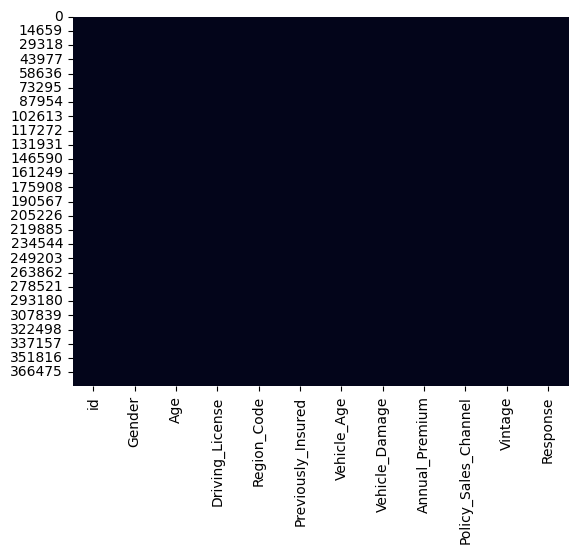

In [10]:
# Visualizing the missing values
# msno.bar(dataset)
sns.heatmap(dataset.isnull(),cbar=False)

### What did you know about your dataset?

We have 381109 rows and 12 columns in our dataset.

Dataset have zero duplicate values.

Dataset have zero null values

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
dataset.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
# Dataset Describe
dataset.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


### Variables Description

1. id : Unique ID for the customer

2. Gender : Gender of the customer

3. Age : Age of the customer

4. Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code : Unique code for the region of the customer

6. Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 :  
   Customer doesn't have Vehicle Insurance

7. Vehicle_Age : Age of the Vehicle

8. Vehicle_Damage :1 : Customer got his/her vehicle damaged in the past. 0 :
   Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium : The amount customer needs to pay as premium in the year

10. PolicySalesChannel : Anonymized Code for the channel of outreaching to the
     customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage : Number of Days, Customer has been associated with the company

12. Response : 1 : Customer is interested, 0 : Customer is not interested

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print('Number of unique values in {} column are {}. \n The unique values are {}'.format(i,len(dataset[i].unique()), dataset[i].unique()))
  print('----------------------------------------------------------------------')


Number of unique values in id column are 381109. 
 The unique values are [     1      2      3 ... 381107 381108 381109]
----------------------------------------------------------------------
Number of unique values in Gender column are 2. 
 The unique values are ['Male' 'Female']
----------------------------------------------------------------------
Number of unique values in Age column are 66. 
 The unique values are [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
----------------------------------------------------------------------
Number of unique values in Driving_License column are 2. 
 The unique values are [1 0]
----------------------------------------------------------------------
Number of unique values in Region_Code column are 53. 
 The unique values are [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
df= dataset.copy()
yo = len(df[df['Response']==1])
no = len(df[df['Response']==0])
print('The number of customer responded yes :', yo )
print('The number of customer responded no :', no )

The number of customer responded yes : 46710
The number of customer responded no : 334399


In [15]:
gender_wise_response = pd.DataFrame(df.groupby('Gender')['Response'].value_counts().reset_index(name='Count'))
gender_wise_response

,Gender,Response,Count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


In [16]:
vehicle_age = df.groupby(['Vehicle_Age'])['id'].count().reset_index(name='Count')
vehicle_age

,Vehicle_Age,Count
0,1-2 Year,200316
1,< 1 Year,164786
2,> 2 Years,16007


In [17]:
vehicle_dmg = df.groupby(['Vehicle_Damage'])['id'].count().reset_index(name='Count')
vehicle_dmg

,Vehicle_Damage,Count
0,No,188696
1,Yes,192413


In [18]:
avg_premium =df.groupby('Vehicle_Age')['Annual_Premium'].mean().reset_index(name="average")
avg_premium

,Vehicle_Age,average
0,1-2 Year,30523.582120
1,< 1 Year,30119.552025
2,> 2 Years,35654.499469


In [19]:
Abc =pd.DataFrame(df.groupby(["Previously_Insured"])['Response'].value_counts().reset_index(name='Count'))
Abc

,Previously_Insured,Response,Count
0,0,0,159929
1,0,1,46552
2,1,0,174470
3,1,1,158


### What all manipulations have you done and insights you found?

We have created Response count with different columns.

Only 46710 responded yes.

Average premium for vehicle above 2 years age is higher.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: ylabel='Response'>

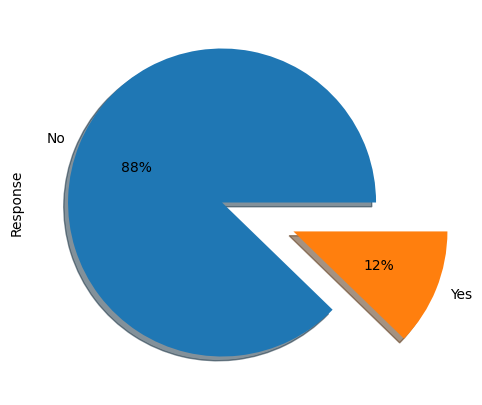

In [20]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 5))
df["Response"].value_counts().plot.pie(autopct= '%1.f%%', explode=[0, 0.5], shadow=True,labels=['No','Yes'])

##### 1. Why did you pick the specific chart?

Pie chart shows good visual and percentage wise distribution

##### 2. What is/are the insight(s) found from the chart?

Only 12 % people responded yes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

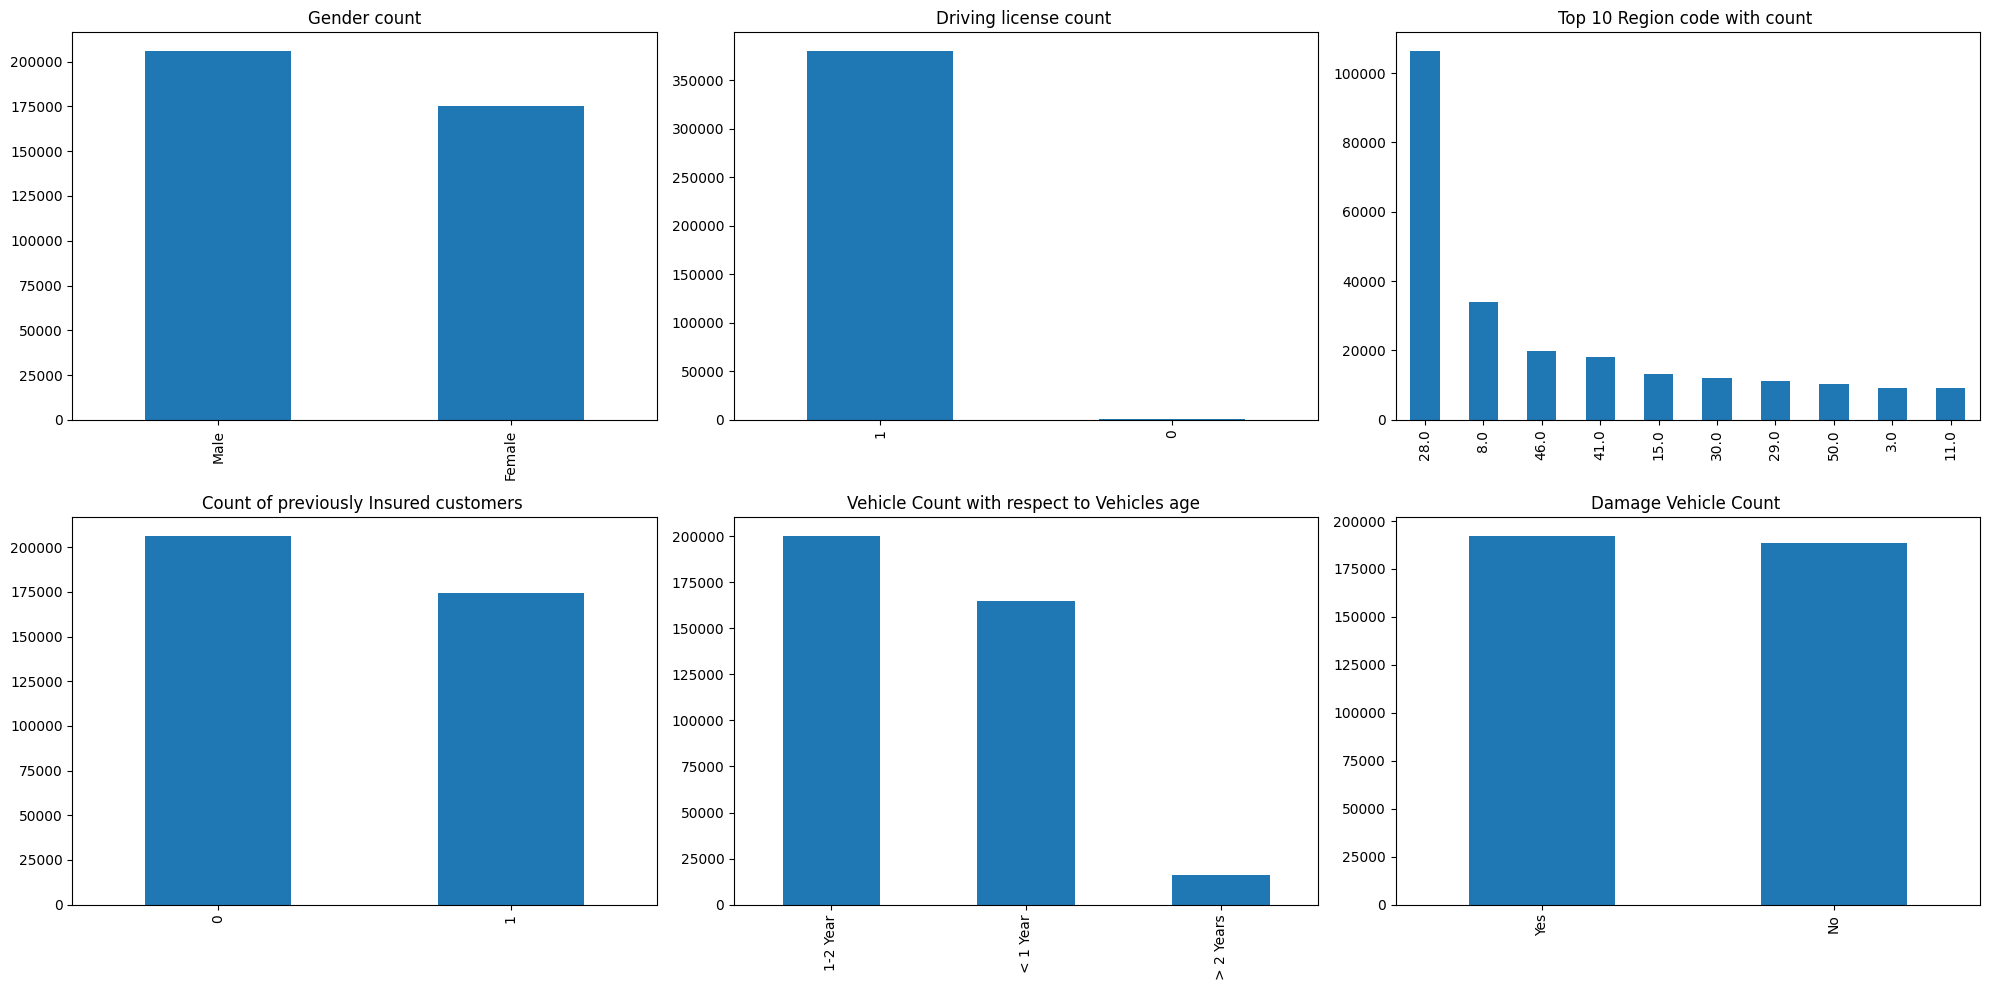

In [21]:
# Chart - 2 visualization code
f, ax = plt.subplots(2, 3, figsize = (20,10))
df['Gender'].value_counts().plot(kind="bar",ax = ax[0, 0],title="Gender count")
df['Driving_License'].value_counts().plot(kind="bar",ax = ax[0, 1],title="Driving license count ",)
df['Region_Code'].value_counts().head(10).plot(kind="bar",ax = ax[0, 2],title="Top 10 Region code with count ",)
df['Previously_Insured'].value_counts().plot(kind="bar",ax = ax[1, 0],title="Count of previously Insured customers ",)
df['Vehicle_Age'].value_counts().plot(kind="bar",ax = ax[1, 1],title="Vehicle Count with respect to Vehicles age ",)
df['Vehicle_Damage'].value_counts().plot(kind="bar",ax = ax[1, 2],title="Damage Vehicle Count ",)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To check count of various columns.

##### 2. What is/are the insight(s) found from the chart?

1. Male gender count is highest.
2. Most of customers have driving license.
3.Top 10 Region code with customer count and region code 28.0 have highest customers.
4. Almost 60:40 customers insured and not insured respectively.
5. Most vehicle are between 1-2 year old.
6. Almost 50% vehicles are damaged.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

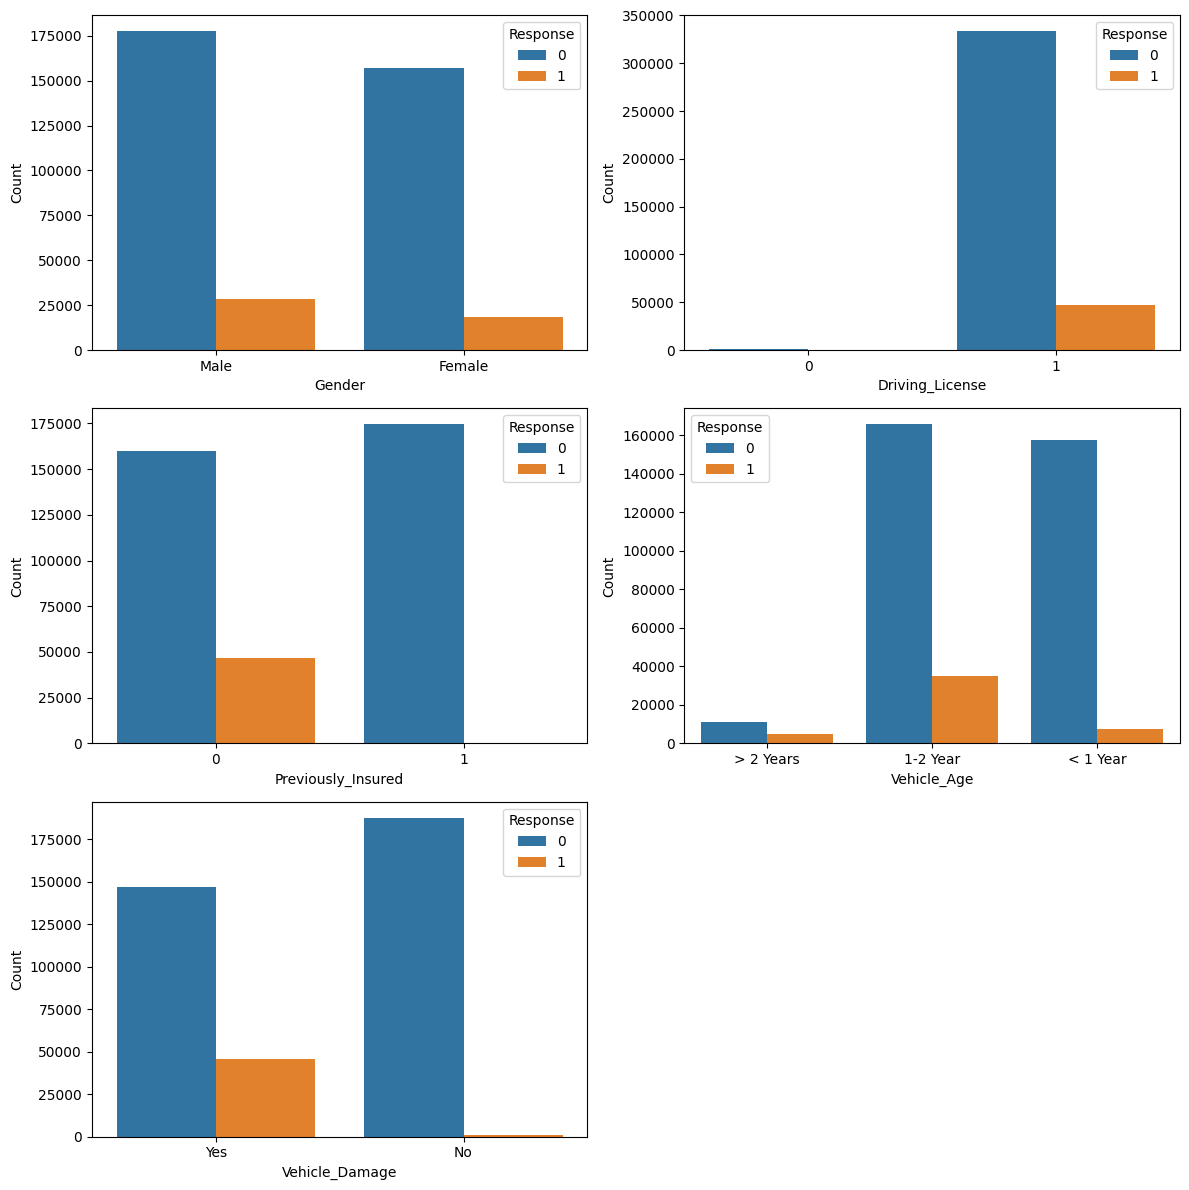

In [22]:
# Chart - 3 visualization code
col = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage' ]
plt.figure(figsize=(12,12))
n = 1
for i in col :
  ax= plt.subplot(3,2,n)
  sns.countplot(x=i, hue='Response', data=df)
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.tight_layout()
  n+=1
plt.show()

##### 1. Why did you pick the specific chart?

To find response with respect to different columns.


##### 2. What is/are the insight(s) found from the chart?

1. Men have responed more compare to women.
2. All customer who have responded yes have driving license.
3. Mostly customer who have not previously insured responded yes.
4. Vehicle age between 1-2 years have higher no. of yes response.
5. Mostly customer who have damaged vehicle responded yes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Text(0.5, 1.0, 'Mean of Annual Premium with respect to Vehicle age')

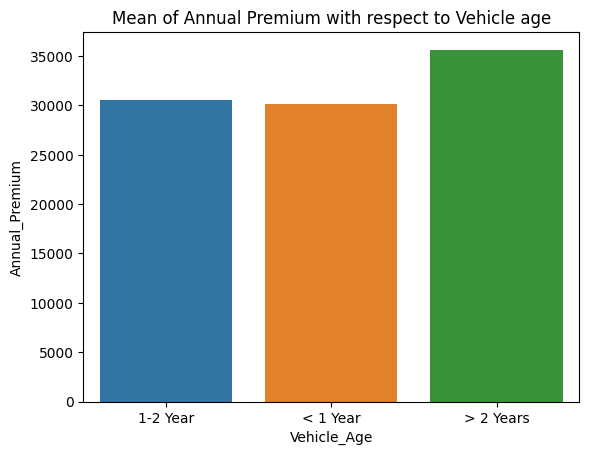

In [23]:
# Chart - 4 visualization code
df1 =df.groupby('Vehicle_Age')['Annual_Premium'].mean().reset_index()
sns.barplot(x= 'Vehicle_Age', y = 'Annual_Premium', data = df1)
plt.title('Mean of Annual Premium with respect to Vehicle age')

##### 1. Why did you pick the specific chart?

To compare average annual premium with vehicle age.

##### 2. What is/are the insight(s) found from the chart?

Vehicle age more 2 years have higher annual premium.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Text(0.5, 1.0, 'Mean of Annual Premium with respect to Vehicle age')

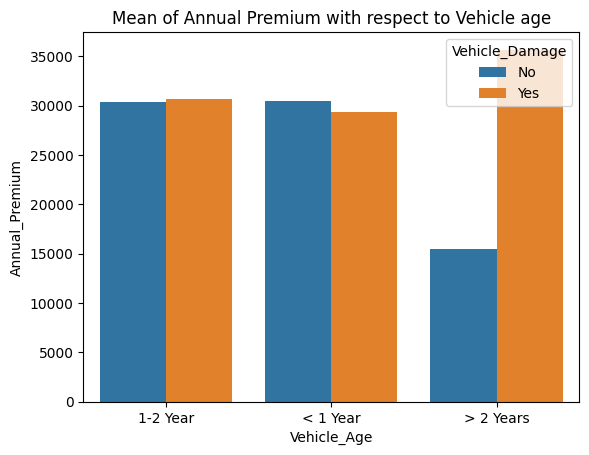

In [24]:
# Chart - 5 visualization code
df2 =df.groupby(['Vehicle_Age', 'Vehicle_Damage'])['Annual_Premium'].mean().reset_index()
sns.barplot(x= 'Vehicle_Age', y = 'Annual_Premium', hue= 'Vehicle_Damage', data = df2)
plt.title('Mean of Annual Premium with respect to Vehicle age')

##### 1. Why did you pick the specific chart?

To compare vehicle age and annual premium with their response.

##### 2. What is/are the insight(s) found from the chart?

Customer who's Vehicle age more than 2 years have responded yes is highest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [25]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#### Chart - 6

<Axes: xlabel='Response', ylabel='Age'>

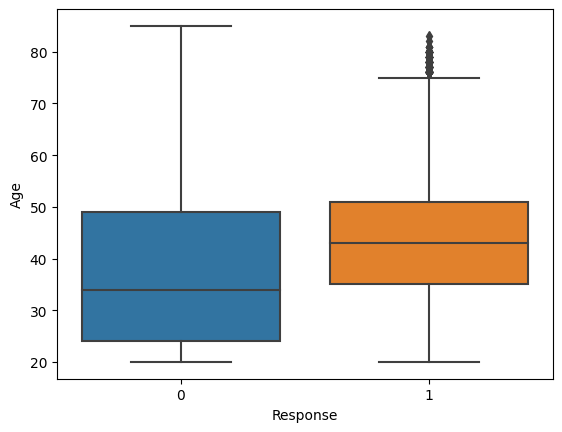

In [26]:
# Chart - 6 visualization code
sns.boxplot(y='Age', x = 'Response', data=df)

##### 1. Why did you pick the specific chart?

To check the outliers in age column

##### 2. What is/are the insight(s) found from the chart?

There are some outliers where customers responded yes

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<ipython-input-27-a10f915038cc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Annual_Premium)


<Axes: xlabel='Annual_Premium', ylabel='Density'>

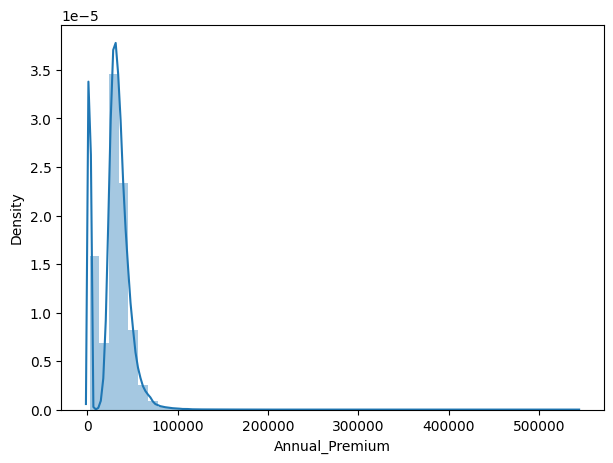

In [27]:
# Chart - 7 visualization code
plt.figure(figsize=(7,5))
sns.distplot(df.Annual_Premium)

<Axes: xlabel='Response', ylabel='Annual_Premium'>

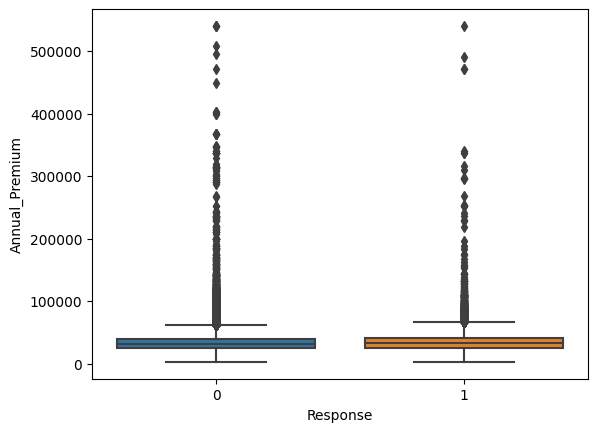

In [28]:
sns.boxplot(y='Annual_Premium', x='Response', data=df)

##### 1. Why did you pick the specific chart?

To find the distribution of annual premium.

##### 2. What is/are the insight(s) found from the chart?

1. Distribution of annual premium is right skewed.
2. We can clearly see some outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<ipython-input-29-defc7804e1de>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Vintage)


<Axes: xlabel='Vintage', ylabel='Density'>

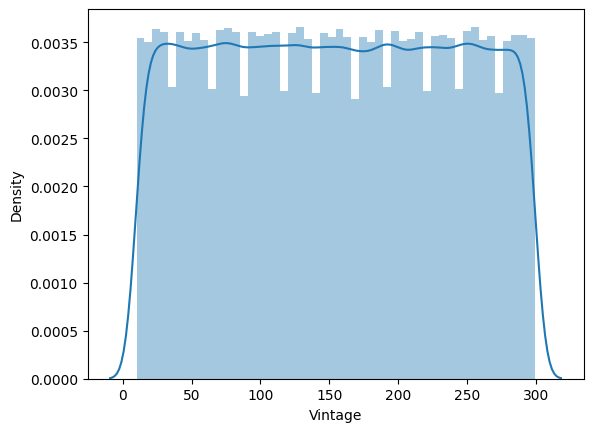

In [29]:
# Chart - 8 visualization code
sns.distplot(df.Vintage)

##### 1. Why did you pick the specific chart?

To find distribution of Vintage column

##### 2. What is/are the insight(s) found from the chart?

 Vintage column is normally distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<Axes: xlabel='Age', ylabel='Annual_Premium'>

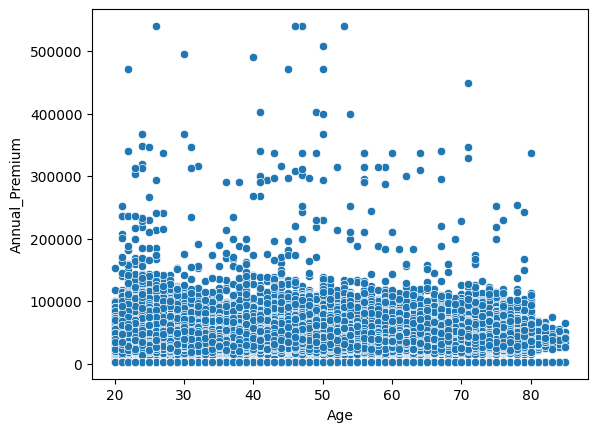

In [30]:
# Chart - 9 visualization code
sns.scatterplot(x='Age',y='Annual_Premium', data=df)

##### 1. Why did you pick the specific chart?

To compare age vs annual premium column

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

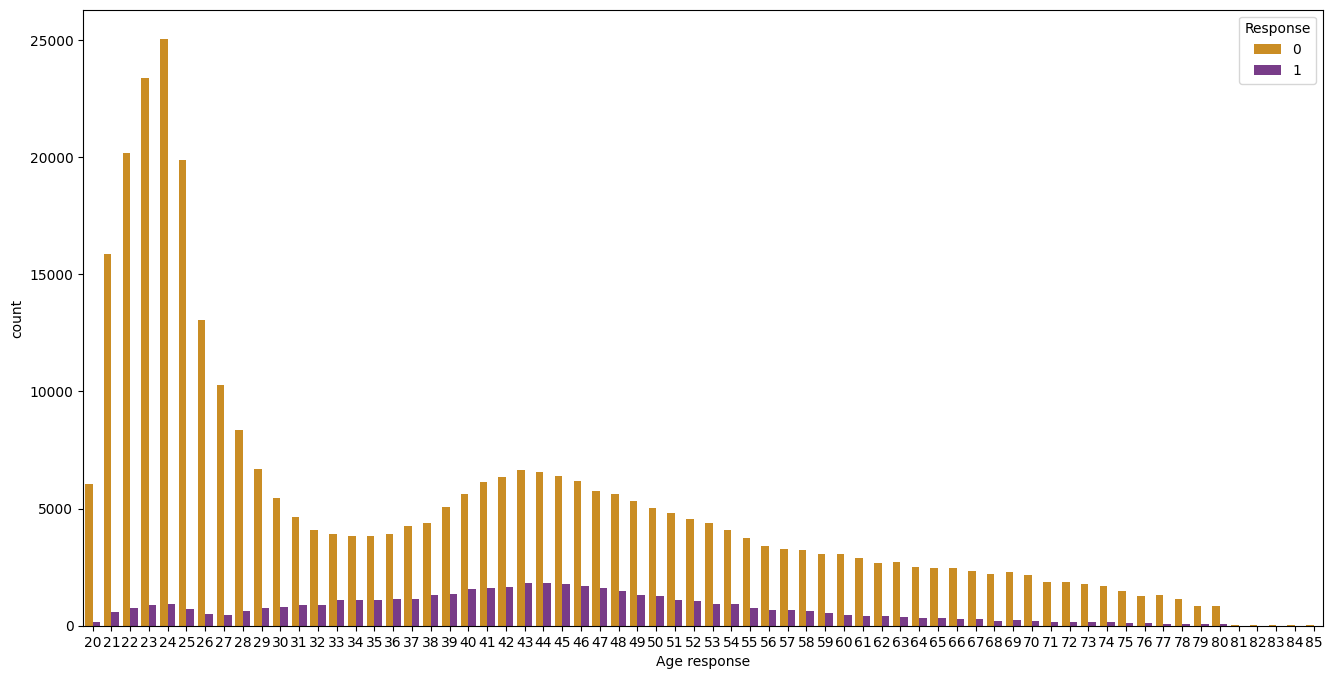

In [31]:
# Chart - 10 visualization code

#Age VS Response
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='Age',hue='Response', palette='CMRmap_r')
plt.xlabel('Age response')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

To compare response count with respect to age.

##### 2. What is/are the insight(s) found from the chart?

The age between 34 to 50 customers have higher yes response.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

<Axes: xlabel='Age', ylabel='count'>

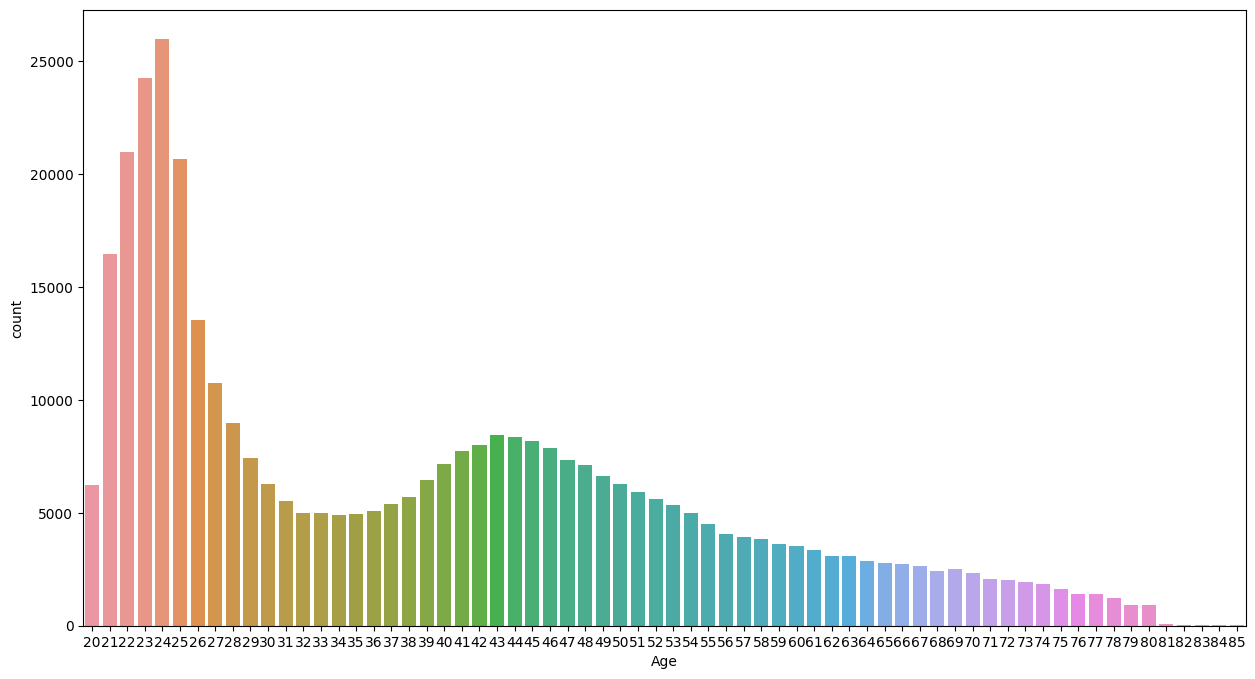

In [32]:
# Chart - 11 visualization code
#Distribution of Age
plt.figure(figsize=(15,8))
sns.countplot(x=df['Age'],data=df)

##### 1. Why did you pick the specific chart?

To check the age distribution.

##### 2. What is/are the insight(s) found from the chart?

The distribution of age is little bit of right skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 - Correlation Heatmap

<ipython-input-33-51d687af2c6d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), annot= True)


<Axes: >

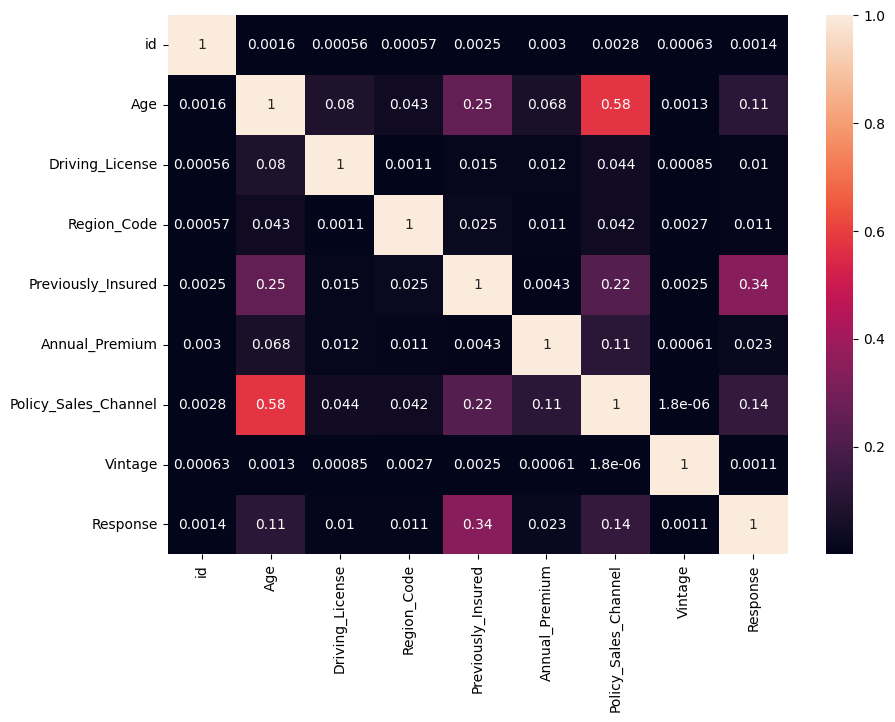

In [33]:
# Correlation Heatmap visualization code
plt.figure(figsize= (10,7))
sns.heatmap(df.corr().abs(), annot= True)

In [34]:
correlation = df.corr()
correlation['Response'].sort_values(ascending=False)[1:]

<ipython-input-34-cff058f33009>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

##### 1. Why did you pick the specific chart?

To find correlation between the column.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 13 - Pair Plot

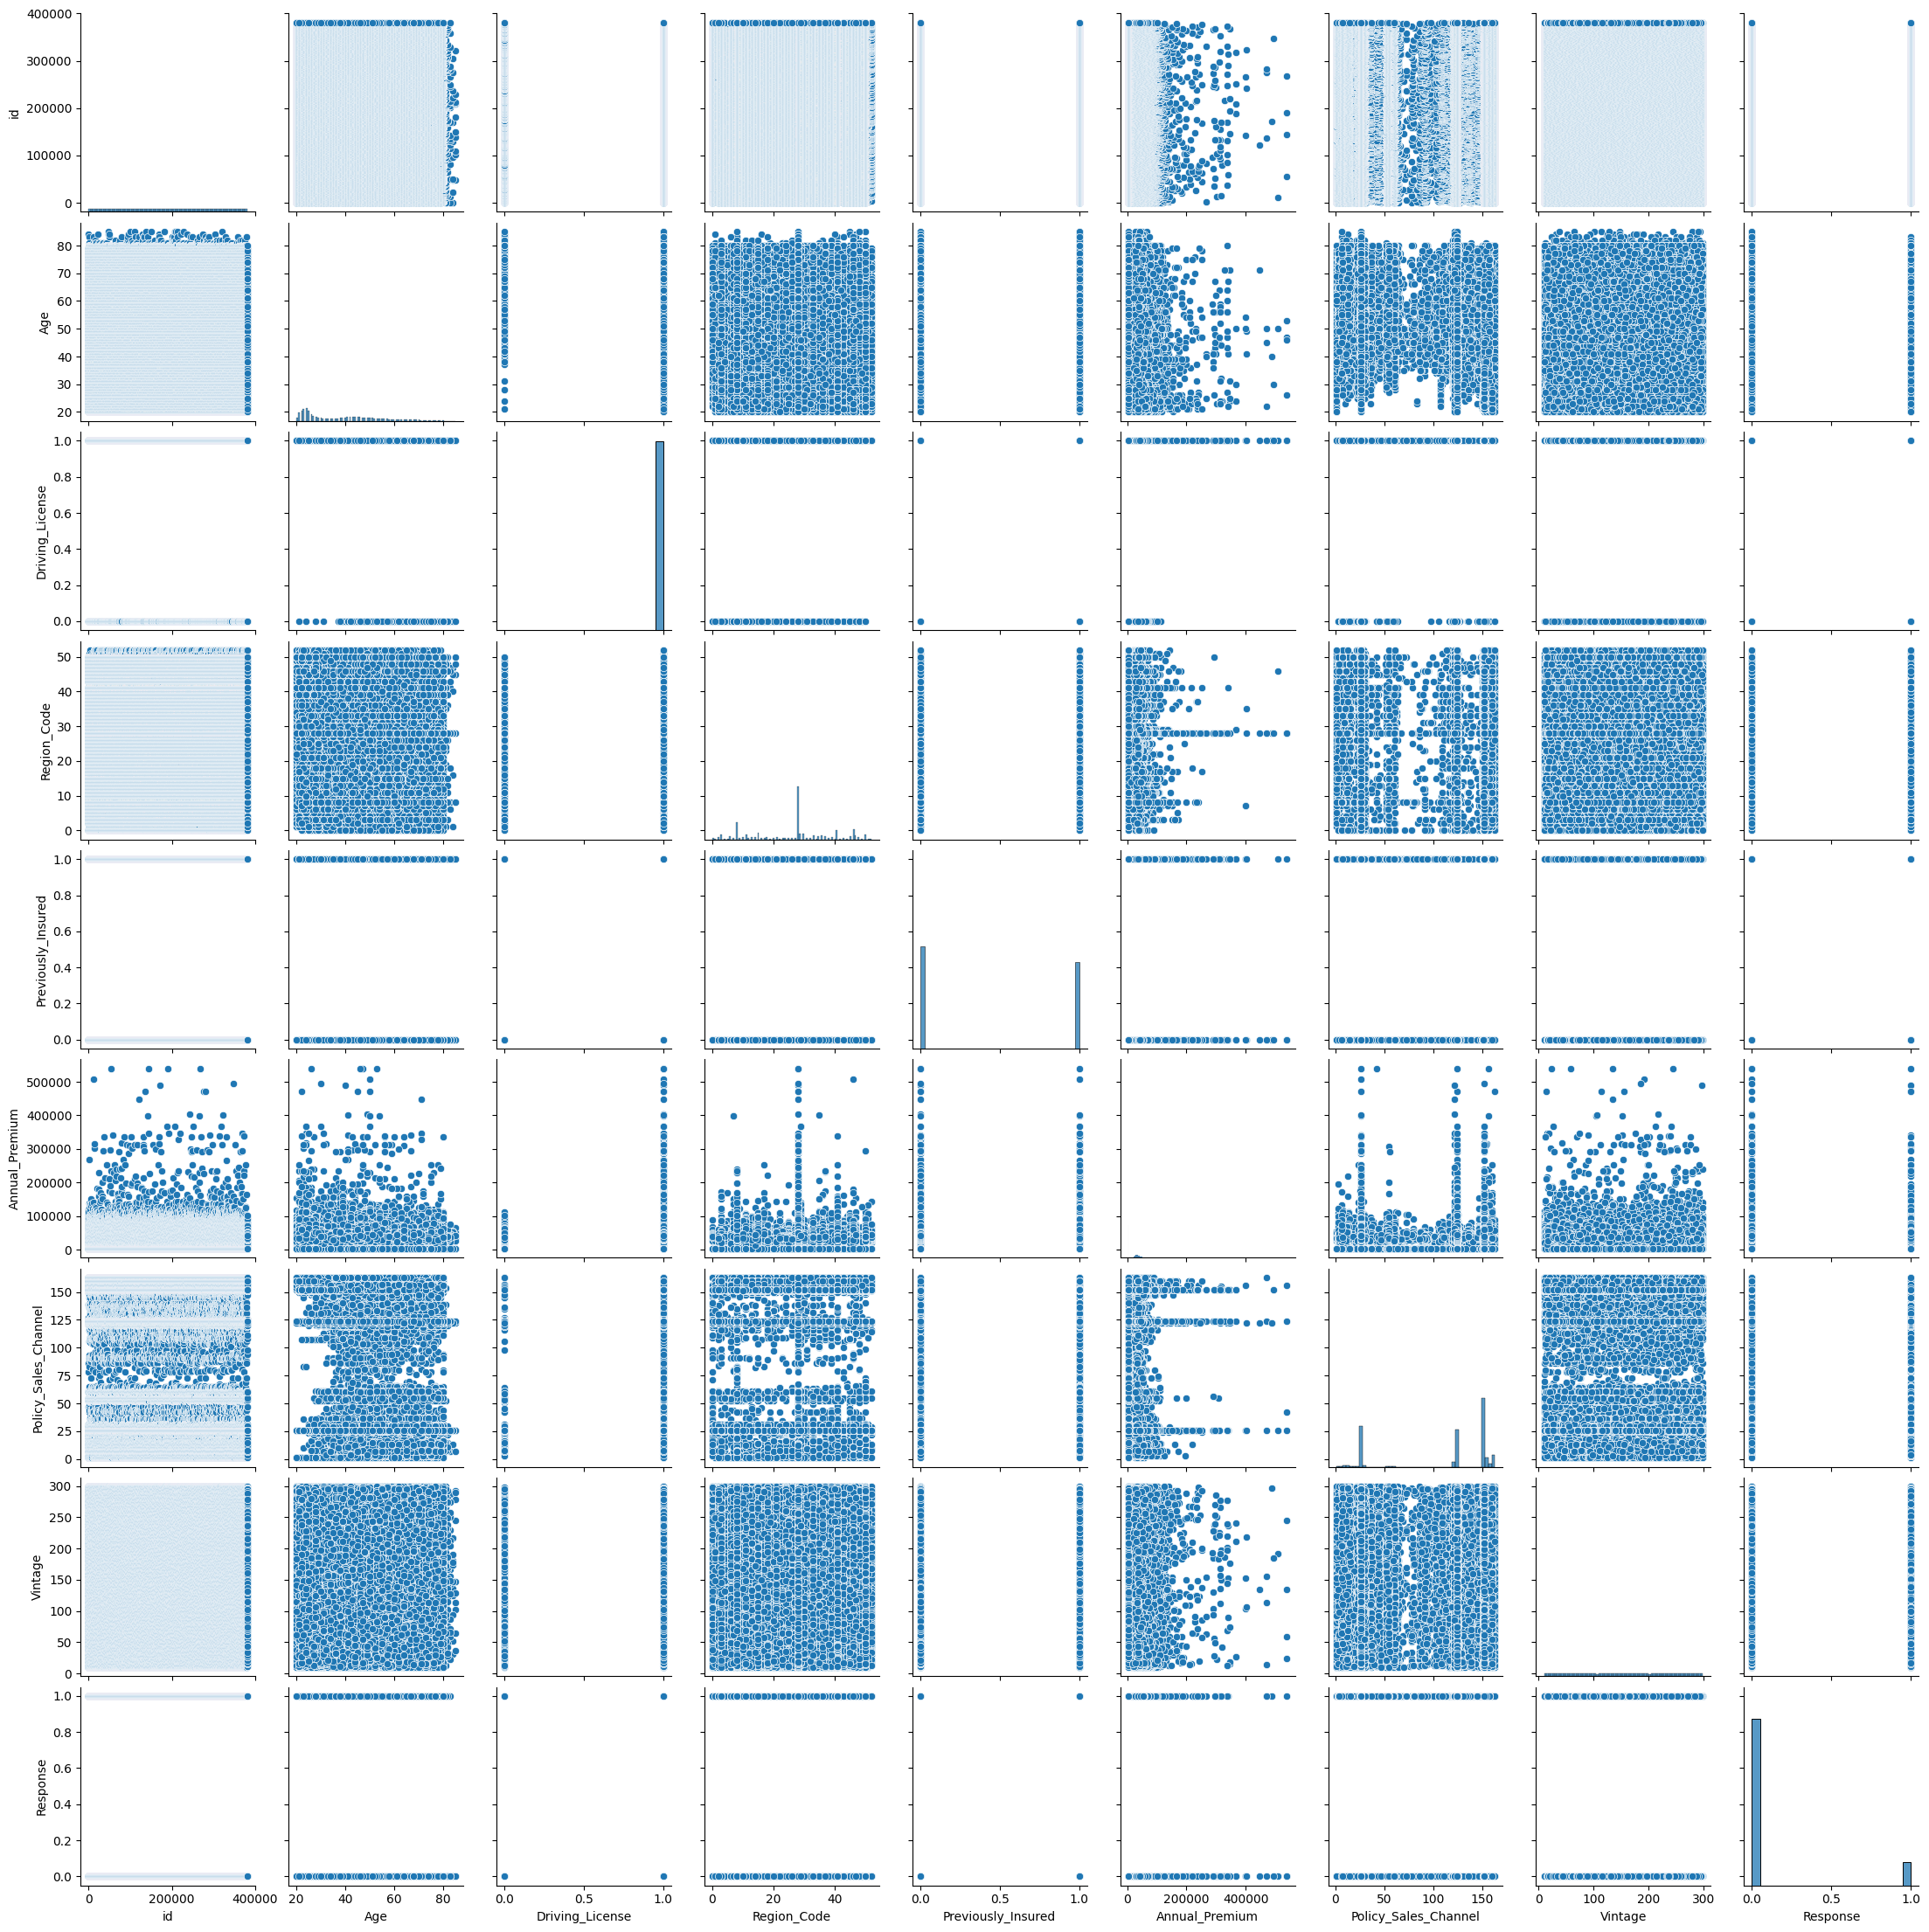

In [35]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [39]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [40]:
df.shape

(381109, 12)

In [41]:
# Handling Outliers & Outlier treatments
def outlier_remove(df_in, col):
  q1 = df[col].quantile(0.25)
  q3= df[col].quantile(0.75)
  IQR = q3-q1
  low_bridge=q1- 1.5*IQR
  high_bridge = q3+1.5*IQR
  df_out= df_in.loc[(df_in[col]> low_bridge) & (df_in[col]< high_bridge)]
  return df_out

In [42]:
main= outlier_remove(df, 'Annual_Premium')

In [43]:
main.shape

(370789, 12)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [44]:
main['Vintage']= main['Vintage'].apply(lambda x : 'New' if x <= 90 else 'Older' if x<=180 else 'Oldest' if x<=270 else 'Vintage')

<ipython-input-44-427c1c28350a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Vintage']= main['Vintage'].apply(lambda x : 'New' if x <= 90 else 'Older' if x<=180 else 'Oldest' if x<=270 else 'Vintage')


In [45]:
main['Vintage'] = main['Vintage'].map({'New':1, "Older":2, 'Oldest':3, 'Vintage':4})


<ipython-input-45-532a090fd4d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Vintage'] = main['Vintage'].map({'New':1, "Older":2, 'Oldest':3, 'Vintage':4})


In [46]:
# Encode your categorical columns
main['Gender']= main['Gender'].map({'Female': 0, 'Male':1})
main['Vehicle_Damage']= main['Vehicle_Damage'].map({'Yes':1, 'No':0})

main = pd.get_dummies(main, drop_first = True)


<ipython-input-46-616169d4b9c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Gender']= main['Gender'].map({'Female': 0, 'Male':1})
<ipython-input-46-616169d4b9c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Vehicle_Damage']= main['Vehicle_Damage'].map({'Yes':1, 'No':0})


In [47]:
main.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# Expand Contraction

#### 2. Lower Casing

In [49]:
# Lower Casing

#### 3. Removing Punctuations

In [50]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords

In [53]:
# Remove White spaces

#### 6. Rephrase Text

In [54]:
# Rephrase Text

#### 7. Tokenization

In [55]:
# Tokenization

#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [57]:
# POS Taging

#### 10. Text Vectorization

In [58]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [60]:
main.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28.0,0,1,40454.0,26.0,3,1,0,1
1,2,1,76,1,3.0,0,0,33536.0,26.0,3,0,0,0
2,3,1,47,1,28.0,0,1,38294.0,26.0,1,1,0,1
3,4,1,21,1,11.0,1,0,28619.0,152.0,3,0,1,0
4,5,0,29,1,41.0,1,0,27496.0,152.0,1,0,1,0


In [61]:
# # Select your features wisely to avoid overfitting
X = main.drop(['id',"Response"], axis=1)
y= main['Response']

In [62]:


# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a boolean mask to identify highly correlated features
mask = correlation_matrix.abs() >= 0.8  # Set the correlation threshold as desired

# Apply the mask to create a new correlation matrix
reduced_matrix = correlation_matrix.mask(mask)

# Create a new feature matrix with the remaining features
X = X[reduced_matrix.columns]

In [63]:
X.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [64]:
# Transform Your data

### 6. Data Scaling

In [65]:
# # Scaling your data
# # Split your data to train and test. Choose Splitting ratio wisely.
# X_train,X_test,y_train,y_test=train_test_split(X_,y_,test_size=0.2,random_state=69)


In [66]:
main.shape

(370789, 13)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [67]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [68]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

In [69]:


# check for imbalance in data
y.value_counts()

0    325634
1     45155
Name: Response, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [70]:
# Handling Imbalanced Dataset (If needed)
from collections import Counter
os=SMOTETomek(random_state=42)
X_,y_=os.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_)))

The number of classes before fit Counter({0: 325634, 1: 45155})
The number of classes after fit Counter({1: 315892, 0: 315892})


In [71]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test=train_test_split(X_,y_,test_size=0.2,random_state=69)


In [72]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((505427, 11), (126357, 11), (505427,), (126357,))

In [73]:
# Scaling your data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 = Logistic Regression

In [74]:
# ML Model - 1 Implementation
logs= LogisticRegression(fit_intercept=True, max_iter=10000)


# Fit the Algorithm
logs.fit(X_train,y_train)

# Predict on the model
train_pred = logs.predict(X_train)
test_pred = logs.predict(X_test)

# get the predicted probabilities
logistic_train_prob = logs.predict_proba(X_train)
logistic_test_prob = logs.predict_proba(X_test)[:,1]

train_accuracy1= accuracy_score(train_pred, y_train)
test_accuracy1= accuracy_score(test_pred, y_test)

print('\n')
print("The accuracy on train data is ", train_accuracy1)
print("The accuracy on test data is ", test_accuracy1)
print('\n')

 # calculating precision, recall, f1 score on the test set
precision1 = precision_score(y_test, test_pred, average='weighted')
print("The precision on test dataset is", precision1)

recall1 = recall_score(y_test, test_pred, average='weighted')
print("The recall on test dataset is", recall1)

f1_1 = f1_score(y_test, test_pred, average='weighted')
print("The f1 score on test dataset is", f1_1)

  # calculating roc_auc_score on the test set
roc1 = roc_auc_score(y_test, logistic_test_prob, average='weighted')
print("The roc auc score on test dataset is", roc1)




The accuracy on train data is  0.8070027916989001
The accuracy on test data is  0.804925726315123


The precision on test dataset is 0.8160676614032574
The recall on test dataset is 0.804925726315123
The f1 score on test dataset is 0.8031176890585335
The roc auc score on test dataset is 0.8814967179561939


In [75]:
cm1= confusion_matrix( y_train, train_pred)
cm2= confusion_matrix( y_test, test_pred)
print('For train\n' ,
      cm1)
print('\n')
print('For Test\n' , cm2)

For train
 [[180167  72740]
 [ 24806 227714]]


For Test
 [[44703 18282]
 [ 6367 57005]]


In [76]:
cr1 = classification_report(y_train,train_pred)
cr2 =classification_report(y_test, test_pred)
print('For train\n' , cr1)

print('----------------------------------------------------------------------------')
print('For test\n' , cr2)


For train
               precision    recall  f1-score   support

           0       0.88      0.71      0.79    252907
           1       0.76      0.90      0.82    252520

    accuracy                           0.81    505427
   macro avg       0.82      0.81      0.81    505427
weighted avg       0.82      0.81      0.81    505427

----------------------------------------------------------------------------
For test
               precision    recall  f1-score   support

           0       0.88      0.71      0.78     62985
           1       0.76      0.90      0.82     63372

    accuracy                           0.80    126357
   macro avg       0.82      0.80      0.80    126357
weighted avg       0.82      0.80      0.80    126357



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

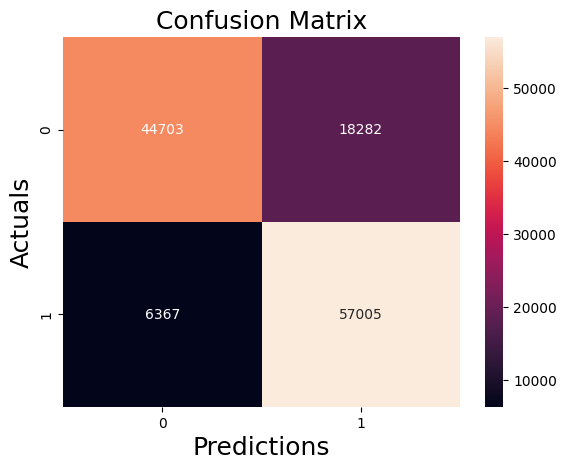

In [77]:
# Visualizing evaluation Metric Score chart

sns.heatmap(cm2, annot=True, fmt='g' )
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

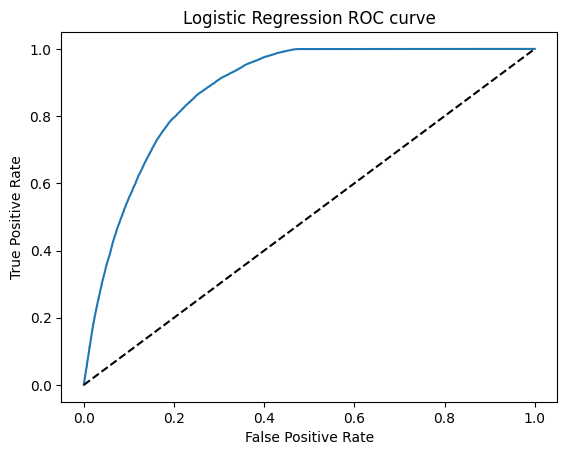

In [78]:

fpr, tpr, thresholds = roc_curve(y_test, logistic_test_prob)

plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [80]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logsr = LogisticRegression(max_iter=10000)
param1 = {'C': [1, 0.5, 0.1, 5, 7, 9, 12],'penalty':['l2','l1', 'elasticnet']}

grid_search = GridSearchCV(estimator=logsr, param_grid= param1, cv=5, scoring='f1')

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [81]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_pred2 = grid_result.predict(X_train)
test_pred2 = grid_result.predict(X_test)

# get the predicted probabilities
logcv_train_prob = logs.predict_proba(X_train)
logcv_test_prob = logs.predict_proba(X_test)[:,1]


train_accuracy2= accuracy_score(train_pred2, y_train)
test_accuracy2= accuracy_score(test_pred2, y_test)

print('\n')
print("The accuracy on train data is ", train_accuracy2)
print("The accuracy on test data is ", test_accuracy2)
print('\n')

 # calculating precision and recall on the test set
precision2 = precision_score(y_test, test_pred2, average='weighted')
print("The precision on test dataset is", precision2)

recall2 = recall_score(y_test, test_pred2, average='weighted')
print("The recall on test dataset is", recall2)

f1_2 = f1_score(y_test, test_pred2, average='weighted')
print("The f1 score on test dataset is", f1_2)


  # calculating roc_auc_score on the test set
roc2 = roc_auc_score(y_test, logcv_test_prob, average='weighted')
print("The roc auc score on test dataset is", roc2)


Best: 0.823566 using {'C': 0.5, 'penalty': 'l2'}


The accuracy on train data is  0.8069988346487228
The accuracy on test data is  0.80490989814573


The precision on test dataset is 0.8160512393121108
The recall on test dataset is 0.80490989814573
The f1 score on test dataset is 0.8031017141864543
The roc auc score on test dataset is 0.8814967179561939


In [82]:
cm3= confusion_matrix( y_train, train_pred2)
cm4= confusion_matrix( y_test, test_pred2)
print('For train\n' ,
      cm3)
print('\n')
print('For Test\n' , cm4)

For train
 [[180166  72741]
 [ 24807 227713]]


For Test
 [[44702 18283]
 [ 6368 57004]]


In [83]:
cr3 = classification_report(y_train,train_pred2)
cr4 =classification_report(y_test,test_pred2)
print('For train\n' , cr3)

print('----------------------------------------------------------------------------')
print('For test\n' , cr4)


For train
               precision    recall  f1-score   support

           0       0.88      0.71      0.79    252907
           1       0.76      0.90      0.82    252520

    accuracy                           0.81    505427
   macro avg       0.82      0.81      0.81    505427
weighted avg       0.82      0.81      0.81    505427

----------------------------------------------------------------------------
For test
               precision    recall  f1-score   support

           0       0.88      0.71      0.78     62985
           1       0.76      0.90      0.82     63372

    accuracy                           0.80    126357
   macro avg       0.82      0.80      0.80    126357
weighted avg       0.82      0.80      0.80    126357



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

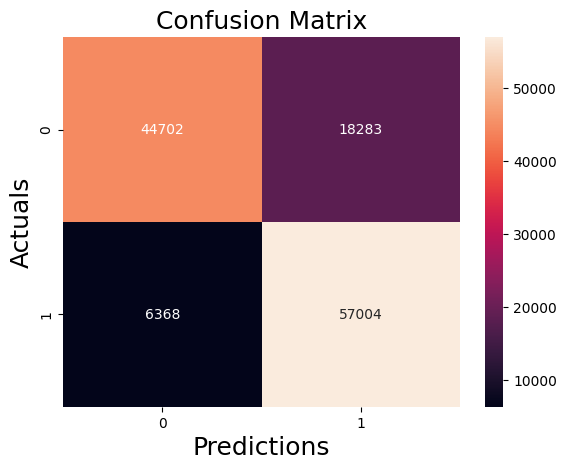

In [84]:
# Visualizing evaluation Metric Score chart

sns.heatmap(cm4, annot=True, fmt='g' )
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

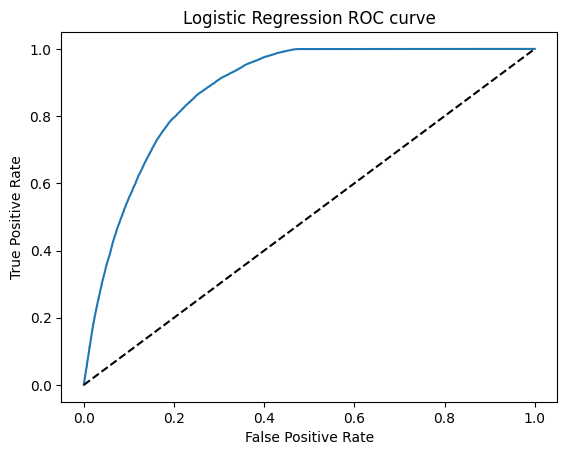

In [85]:

fpr, tpr, thresholds = roc_curve(y_test, logcv_test_prob)

plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

Answer Here.

### ML Model - 2 =  K -  Nearest Neighbour

In [86]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

# Predict on the model
train_pred3 = knn.predict(X_train)
test_pred3 = knn.predict(X_test)

# get the predicted probabilities
knn_train_prob = knn.predict_proba(X_train)
knn_test_prob = knn.predict_proba(X_test)[:,1]

train_accuracy3= accuracy_score(train_pred3, y_train)
test_accuracy3= accuracy_score(test_pred3, y_test)

print('\n')
print("The accuracy on train data is ", train_accuracy3)
print("The accuracy on test data is ", test_accuracy3)
print('\n')

 # calculating precision, recall, f1 score on the test set
precision3 = precision_score(y_test, test_pred3, average='weighted')
print("The precision on test dataset is", precision3)

recall3 = recall_score(y_test, test_pred3, average='weighted')
print("The recall on test dataset is", recall3)

f1_3 = f1_score(y_test, test_pred3, average='weighted')
print("The f1 score on test dataset is", f1_3)

  # calculating roc_auc_score on the test set
roc3 = roc_auc_score(y_test, knn_test_prob, average='weighted')
print("The roc auc score on test dataset is", roc3)





The accuracy on train data is  0.8805129128439914
The accuracy on test data is  0.8330602974113029


The precision on test dataset is 0.8372966589738605
The recall on test dataset is 0.8330602974113029
The f1 score on test dataset is 0.8324985277020507
The roc auc score on test dataset is 0.894721707263558


In [87]:
cm5= confusion_matrix( y_train, train_pred3)
cm6= confusion_matrix( y_test, test_pred3)
print('For train\n' ,
      cm5)
print('\n')
print('For Test\n' , cm6)

For train
 [[210032  42875]
 [ 17517 235003]]


For Test
 [[48875 14110]
 [ 6984 56388]]


In [88]:
cr5 = classification_report(y_train,train_pred3)
cr6 =classification_report(y_test,test_pred3)
print('For train\n' , cr5)

print('----------------------------------------------------------------------------')
print('For test\n' , cr6)


For train
               precision    recall  f1-score   support

           0       0.92      0.83      0.87    252907
           1       0.85      0.93      0.89    252520

    accuracy                           0.88    505427
   macro avg       0.88      0.88      0.88    505427
weighted avg       0.88      0.88      0.88    505427

----------------------------------------------------------------------------
For test
               precision    recall  f1-score   support

           0       0.87      0.78      0.82     62985
           1       0.80      0.89      0.84     63372

    accuracy                           0.83    126357
   macro avg       0.84      0.83      0.83    126357
weighted avg       0.84      0.83      0.83    126357



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

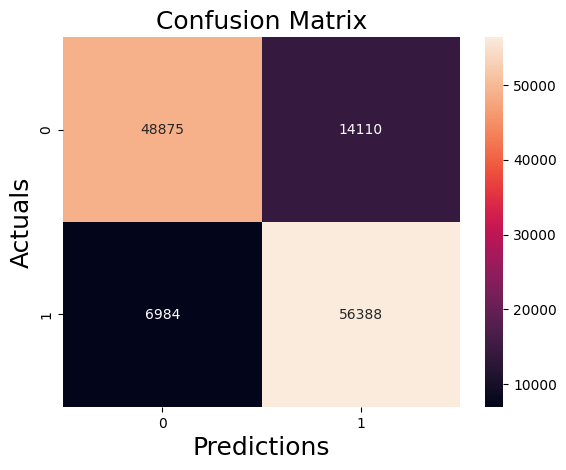

In [89]:
# Visualizing evaluation Metric Score chart

sns.heatmap(cm6, annot=True, fmt='g' )
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

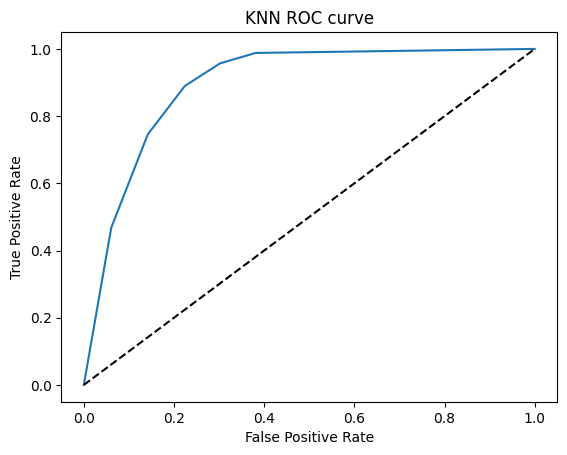

In [90]:
fpr, tpr, thresholds = roc_curve(y_test,knn_test_prob)

plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [91]:
# # ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# grid_params = { 'n_neighbors' : [1,2,3,4],
#                'weights' : ['uniform','distance'],
#                'metric' : ['euclidean','manhattan']}

# gs = GridSearchCV(knn, grid_params, verbose = 1, cv=5, n_jobs = -1)
# # Fit the Algorithm
# knn_gs = gs.fit(X_train_ns, y_train_ns)
# print("Best: %f using %s" % (knn_gs.best_score_, knn_gs.best_params_))
# # Predict on the model
# train_pred4 = grid_result.predict(X_train_ns)
# test_pred4 = grid_result.predict(X_test)

In [92]:
# Best: 0.899964 using {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [93]:
grid_params = { 'n_neighbors' : [1],
               'weights' : ['uniform'],
               'metric' : ['manhattan']}

gs = GridSearchCV(knn, grid_params, verbose = 1, cv=5, n_jobs = -1)
# Fit the Algorithm
knn_gs = gs.fit(X_train, y_train)

print("Best: %f using %s" % (knn_gs.best_score_, knn_gs.best_params_))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: 0.826208 using {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [94]:
# Predict on the model
train_pred4 = knn_gs.predict(X_train)
test_pred4 = knn_gs.predict(X_test)

# get the predicted probabilities
knngs_train_prob = knn_gs.predict_proba(X_train)
knngs_test_prob = knn_gs.predict_proba(X_test)[:,1]

train_accuracy4= accuracy_score(train_pred4, y_train)
test_accuracy4= accuracy_score(test_pred4, y_test)

print('\n')
print("The accuracy on train data is ", train_accuracy4)
print("The accuracy on test data is ", test_accuracy4)
print('\n')

 # calculating precision, recall, f1 score on the test set
precision4 = precision_score(y_test, test_pred4, average='weighted')
print("The precision on test dataset is", precision4)

recall4 = recall_score(y_test, test_pred4, average='weighted')
print("The recall on test dataset is", recall4)

f1_4 = f1_score(y_test, test_pred4, average='weighted')
print("The f1 score on test dataset is", f1_4)

  # calculating roc_auc_score on the test set
roc4 = roc_auc_score(y_test, knngs_test_prob, average='weighted')
print("The roc auc score on test dataset is", roc4)





The accuracy on train data is  0.9898956723720735
The accuracy on test data is  0.8307335565105217


The precision on test dataset is 0.8311848963053743
The recall on test dataset is 0.8307335565105217
The f1 score on test dataset is 0.8306635971904397
The roc auc score on test dataset is 0.8306742311738171


In [95]:
cm7= confusion_matrix( y_train, train_pred4)
cm8= confusion_matrix( y_test, test_pred4)
print('For train\n' ,
      cm7)
print('\n')
print('For Test\n' , cm8)

For train
 [[250278   2629]
 [  2478 250042]]


For Test
 [[51100 11885]
 [ 9503 53869]]


In [96]:
cr7 = classification_report(y_train, train_pred4)
cr8 =classification_report(y_test , test_pred4)
print('For train\n' , cr7)

print('----------------------------------------------------------------------------')
print('For test\n' , cr8)


For train
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    252907
           1       0.99      0.99      0.99    252520

    accuracy                           0.99    505427
   macro avg       0.99      0.99      0.99    505427
weighted avg       0.99      0.99      0.99    505427

----------------------------------------------------------------------------
For test
               precision    recall  f1-score   support

           0       0.84      0.81      0.83     62985
           1       0.82      0.85      0.83     63372

    accuracy                           0.83    126357
   macro avg       0.83      0.83      0.83    126357
weighted avg       0.83      0.83      0.83    126357



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

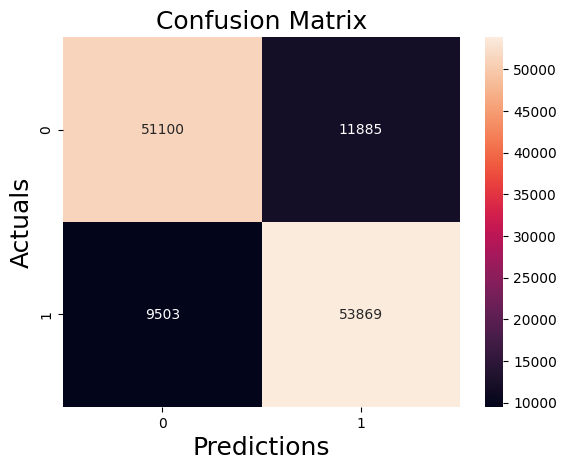

In [97]:
# Visualizing evaluation Metric Score chart

sns.heatmap(cm8, annot=True, fmt='g' )
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

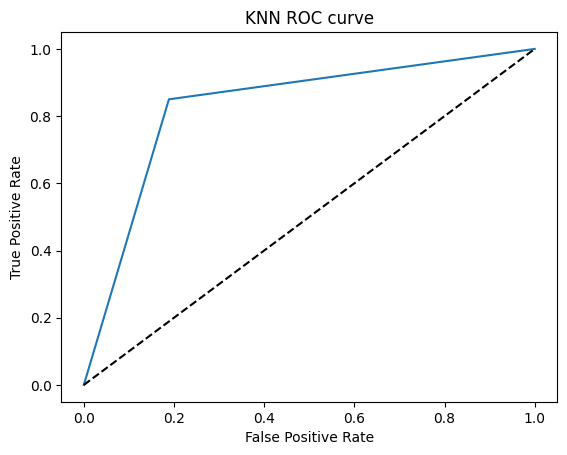

In [98]:
fpr, tpr, thresholds = roc_curve(y_test,knngs_test_prob)

plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 = Naive Bayes

In [99]:
# ML Model - 3 Implementation
nb = GaussianNB()
# Fit the Algorithm
nb.fit(X_train,y_train)


# Predict on the model
train_pred5 = nb.predict(X_train)
test_pred5 = nb.predict(X_test)

# get the predicted probabilities
nb_train_prob = nb.predict_proba(X_train)
nb_test_prob = nb.predict_proba(X_test)[:,1]

train_accuracy5= accuracy_score(train_pred5, y_train)
test_accuracy5= accuracy_score(test_pred5, y_test)

print('\n')
print("The accuracy on train data is ", train_accuracy5)
print("The accuracy on test data is ", test_accuracy5)
print('\n')

 # calculating precision, recall, f1 score on the test set
precision5 = precision_score(y_test, test_pred5, average='weighted')
print("The precision on test dataset is", precision5)

recall5 = recall_score(y_test, test_pred5, average='weighted')
print("The recall on test dataset is", recall5)

f1_5 = f1_score(y_test, test_pred5, average='weighted')
print("The f1 score on test dataset is", f1_5)

  # calculating roc_auc_score on the test set
roc5 = roc_auc_score(y_test, nb_test_prob, average='weighted')
print("The roc auc score on test dataset is", roc5)





The accuracy on train data is  0.7913744220233585
The accuracy on test data is  0.7912343597901185


The precision on test dataset is 0.8259697636428993
The recall on test dataset is 0.7912343597901185
The f1 score on test dataset is 0.7853835658873476
The roc auc score on test dataset is 0.8687904131189337


In [100]:
cm9= confusion_matrix( y_train, train_pred5)
cm10= confusion_matrix( y_test, test_pred5)
print('For train\n' ,
      cm9)
print('\n')
print('For Test\n' , cm10)

For train
 [[158710  94197]
 [ 11248 241272]]


For Test
 [[39463 23522]
 [ 2857 60515]]


In [101]:
cr9 = classification_report(y_train, train_pred5)
cr10 =classification_report(y_test , test_pred5)
print('For train\n' , cr9)

print('----------------------------------------------------------------------------')
print('For test\n' , cr10)


For train
               precision    recall  f1-score   support

           0       0.93      0.63      0.75    252907
           1       0.72      0.96      0.82    252520

    accuracy                           0.79    505427
   macro avg       0.83      0.79      0.79    505427
weighted avg       0.83      0.79      0.79    505427

----------------------------------------------------------------------------
For test
               precision    recall  f1-score   support

           0       0.93      0.63      0.75     62985
           1       0.72      0.95      0.82     63372

    accuracy                           0.79    126357
   macro avg       0.83      0.79      0.79    126357
weighted avg       0.83      0.79      0.79    126357



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

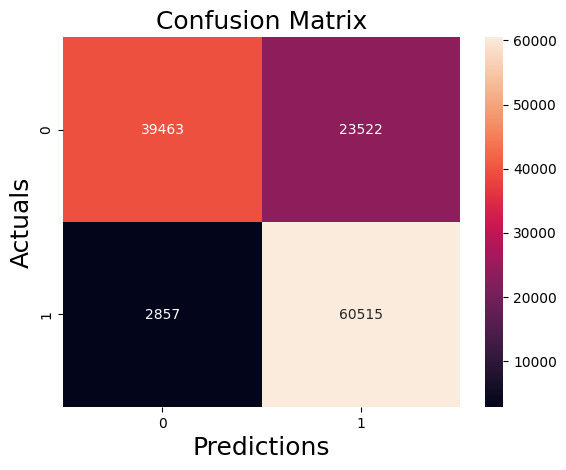

In [102]:
# Visualizing evaluation Metric Score chart

sns.heatmap(cm10, annot=True, fmt='g' )
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

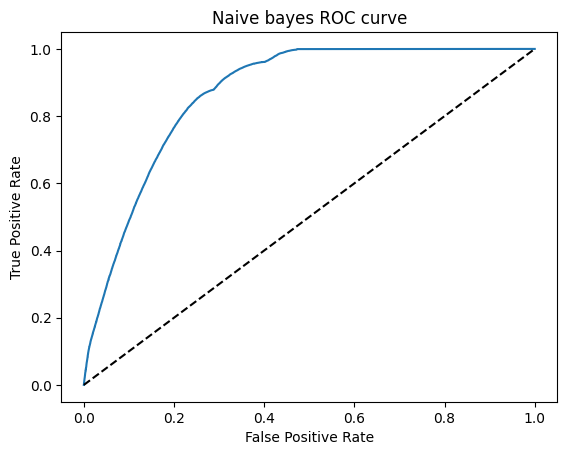

In [103]:
fpr, tpr, thresholds = roc_curve(y_test, nb_test_prob)

plt.title('Naive bayes ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [105]:
models = pd.DataFrame({'models' :["Logestic regression", 'LR With Hyperparmeters ', 'KNN', 'KNN with hyperparmeters', 'Naive Bayes'],
                       'Accuracy': [test_accuracy1,test_accuracy2,test_accuracy3,test_accuracy4,test_accuracy5],
                       "Precision":[precision1,precision2,precision3,precision4,precision5],
                       'Recall' : [recall1, recall2, recall3, recall4,recall5],
                       'F1_score': [f1_1, f1_2,f1_3,f1_4,f1_5],
                       'Roc Auc': [roc1,roc2,roc3,roc4,roc5]},
                      )
models.sort_values(by=['Accuracy'], ascending=False, inplace=True)
models

,models,Accuracy,Precision,Recall,F1_score,Roc Auc
2,KNN,0.833060,0.837297,0.833060,0.832499,0.894722
3,KNN with hyperparmeters,0.830734,0.831185,0.830734,0.830664,0.830674
0,Logestic regression,0.804926,0.816068,0.804926,0.803118,0.881497
1,LR With Hyperparmeters,0.804910,0.816051,0.804910,0.803102,0.881497
4,Naive Bayes,0.791234,0.825970,0.791234,0.785384,0.868790


From above observation.
 I'll choose K Nearest Neighbours model because of good performance compare to others.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [106]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [107]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

From EDA we can see that ,

* the no. of yes responses are less compare to no response.
* Almost 60:40 male females are in the data set.

* Lot of customers have driving license.

* Almost 50% customer's vehicle are damaged.

* Most vehicles are 1-2 year old.

* ~60% customers have insurance already.

* Average Annual premium is high for more than 2 years old vehicles.

I have implemented 3 classification models and achieved a fairly good result for all the algorithms.

1. Logistic Regression
2. K- Nearest Neighbour
3. Naive Bayes

* K Nearest Neighbour model shows 83 % accuracy while naive bayes and logistic regression shows 79 % and 80 % respectively.
* K - Nearest Neighbour shows good performance compare to other models.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***